In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

a = tf.constant(0.)
b = 2 * a
g = tf.gradients(a + b, [a, b])
hello = tf.constant('Hello, TensorFlow!')

sess = tf.compat.v1.Session()
with tf.compat.v1.Session() as sess:
    print(sess.run(g))

[3.0, 1.0]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Flatten, Dense, Conv2D, ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.98:
            # print('inside if')
            self.model.stop_training = True

    early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor="val_accuracy", 
      patience=16,
      mode="auto",
      min_delta=1
)

    filepath = '/content/drive/MyDrive/ModelResults/vgg-19-model-realworld.h5'
    checkpoint = ModelCheckpoint(
      filepath=filepath,
      monitor='val_accuracy',
      verbose=1,
      save_best_only=True,
      mode='max'
)

callback = MyCallback()

In [ ]:
# Load the dataset
data_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train'

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagenerator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size= 64
)

validation_data_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Validation'

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_datagenerator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size= 64
)

Found 3348 images belonging to 12 classes.
Found 1026 images belonging to 12 classes.


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras import models

def build_Sequential():
  model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3), name= "block1_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(64, (3, 3), activation='relu', padding="same", name = "block1_conv2"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding="same", name= "block2_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(128, (3, 3), activation='relu', padding="same", name = "block2_conv2"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding="same", name = "block3_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(256, (3, 3), activation='relu', padding="same", name = "block3_conv2"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding="same", name = "block4_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(256, (3, 3), activation='relu', padding="same", name = "block4_conv2"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(512, (3, 3), activation='relu', padding="same", name = "block5_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(512, (3, 3), activation='relu', padding="same", name = "block5_conv2"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(1024, (3, 3), activation='relu', padding="same", name = "block6_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(1024, (3, 3), activation='relu', padding="same", name = "block6_conv2"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(2048, (3, 3), activation='relu', padding="same", name = "block7_conv1"),
    ZeroPadding2D((1,1)),
    Conv2D(2048, (3, 3), activation='relu', padding="same", name = "block7_conv2"),
    MaxPooling2D(pool_size=(2, 2)),
  ])

  Flat_layer = Flatten()(model.layers[-1].output)
  Dense_1 = Dense(4096, activation='relu')(Flat_layer)
  Output = Dense(12, activation='softmax')(Dense_1) 
  model = Model(inputs=model.inputs, outputs=Output)
  model.call = tf.function(model.call)



  model.compile(optimizer=Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model 

In [ ]:
model = build_Sequential()

In [ ]:
history = model.fit(train_datagenerator,epochs=550,validation_data=validation_datagenerator,steps_per_epoch=16, callbacks=[callback])

Epoch 1/550
16/16 [==============================] - ETA: 0s - batch: 7.5000 - size: 64.0000 - loss: 2.3807 - accuracy: 0.1895

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


16/16 [==============================] - 69s 2s/step - batch: 7.5000 - size: 64.0000 - loss: 2.3807 - accuracy: 0.1895 - val_loss: 2.3393 - val_accuracy: 0.1988
Epoch 2/550
16/16 [==============================] - 33s 2s/step - batch: 7.5000 - size: 64.0000 - loss: 2.3604 - accuracy: 0.2178 - val_loss: 2.3885 - val_accuracy: 0.1988
Epoch 3/550
16/16 [==============================] - 36s 2s/step - batch: 7.5000 - size: 61.2500 - loss: 2.3214 - accuracy: 0.2102 - val_loss: 2.3577 - val_accuracy: 0.1988
Epoch 4/550
16/16 [==============================] - 39s 3s/step - batch: 7.5000 - size: 64.0000 - loss: 2.3066 - accuracy: 0.2148 - val_loss: 2.2992 - val_accuracy: 0.1988
Epoch 5/550
16/16 [==============================] - 32s 2s/step - batch: 7.5000 - size: 64.0000 - loss: 2.1625 - accuracy: 0.2900 - val_loss: 2.1895 - val_accuracy: 0.2651
Epoch 6/550
16/16 [==============================] - 32s 2s/step - batch: 7.5000 - size: 61.2500 - loss: 2.1497 - accuracy: 0.3010 - val_loss: 2.14

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 222, 222, 64)      1792      
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 224, 224, 64)      0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 114, 114, 128)     0   

In [ ]:
test_data_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Test'

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size= 64
)

Found 721 images belonging to 12 classes.


In [ ]:
#Get the accuracy score

test_score = model.evaluate_generator(test_datagenerator)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1273: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 72.12%
[INFO] Loss:  1.4425246020158131


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
target_names = []

for key in train_datagenerator.class_indices:

    target_names.append(key)

In [ ]:
print(target_names)

['Alt+miner', 'B-wilt', 'BLF', 'E-blight', 'L blight', 'healthy', 'insect', 'leaf-miner', 'mosaic', 'physio', 'powdery mildew', 'septoria leaf spot']


In [ ]:
Y_pred = model.predict_generator(test_datagenerator)

y_pred = np.argmax(Y_pred, axis=1)

#print('Confusion Matrix')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1301: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_datagenerator.classes, y_pred))

[[11  0 11  7  1  5  3  4  7  6  4 20]
 [ 1  0  1  5  1  1  1  0  2  2  3  7]
 [ 5  2  4  5  0  2  3  6  5  3  4 26]
 [10  2  5  6  3  8  2  3  2  4  3 16]
 [ 3  0  3  2  2  2  0  0  1  2  0  3]
 [ 3  0  4  3  2  1  3  3  4  4  3  8]
 [ 5  0  5  2  1  4  5  2  2  1  1  8]
 [ 3  2  4  3  2  1  2  1  2  1  3 17]
 [ 6  0  2  4  1  2  2  4  4  0  5 18]
 [ 5  1  4  6  1  1  3  3  3  5  1 18]
 [ 6  1  1  3  1  0  0  4  5  4  2 10]
 [32  6 13 17  3 15 11 11 13 15 12 72]]


In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(test_datagenerator.classes, y_pred, target_names=target_names))

Classification Report
                    precision    recall  f1-score   support

         Alt+miner       0.12      0.14      0.13        79
            B-wilt       0.00      0.00      0.00        24
               BLF       0.07      0.06      0.07        65
          E-blight       0.10      0.09      0.09        64
          L blight       0.11      0.11      0.11        18
           healthy       0.02      0.03      0.03        38
            insect       0.14      0.14      0.14        36
        leaf-miner       0.02      0.02      0.02        41
            mosaic       0.08      0.08      0.08        48
            physio       0.11      0.10      0.10        51
    powdery mildew       0.05      0.05      0.05        37
septoria leaf spot       0.32      0.33      0.33       220

          accuracy                           0.16       721
         macro avg       0.10      0.10      0.10       721
      weighted avg       0.15      0.16      0.16       721



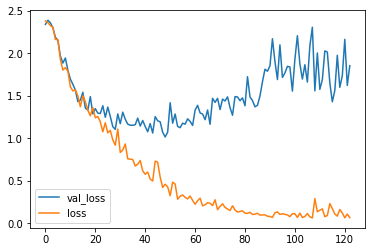

In [ ]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
loss = history.history['loss']
x = range(len(loss))

plt.plot(x, val_loss, label='val_loss')
plt.plot(x, loss, label='loss')
plt.legend()
plt.show()

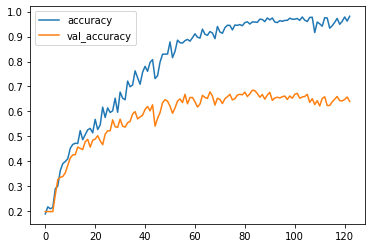

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
x = range(len(accuracy))

plt.plot(x, accuracy, label='accuracy')
plt.plot(x, val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1301: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


NameError: ignored

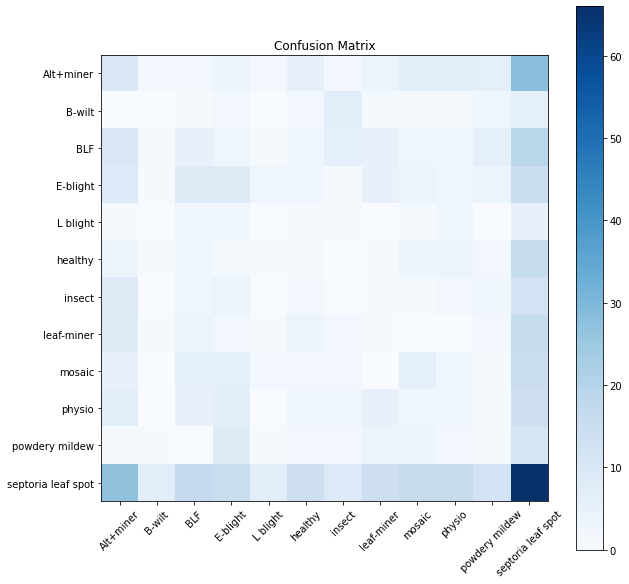

In [ ]:
Y_pred = model.predict_generator(test_datagenerator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_datagenerator.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:-1]] 

In [ ]:
layer_outputs

[<tf.Tensor 'block1_conv1_input_1:0' shape=(None, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'block1_conv1_1/Relu:0' shape=(None, 222, 222, 64) dtype=float32>,
 <tf.Tensor 'zero_padding2d_7/Pad:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2_1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1_1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 <tf.Tensor 'zero_padding2d_8/Pad:0' shape=(None, 114, 114, 128) dtype=float32>,
 <tf.Tensor 'block2_conv2_1/Relu:0' shape=(None, 114, 114, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_8/MaxPool:0' shape=(None, 57, 57, 128) dtype=float32>,
 <tf.Tensor 'block3_conv1_1/Relu:0' shape=(None, 57, 57, 256) dtype=float32>,
 <tf.Tensor 'zero_padding2d_9/Pad:0' shape=(None, 59, 59, 256) dtype=float32>,
 <tf.Tensor 'block3_conv2_1/Relu:0' shape=(None, 59, 59, 256) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' sh

In [ ]:
for layer in model.layers:
    print(layer.output_shape)

[(None, 224, 224, 3)]
(None, 222, 222, 64)
(None, 224, 224, 64)
(None, 224, 224, 64)
(None, 112, 112, 64)
(None, 112, 112, 128)
(None, 114, 114, 128)
(None, 114, 114, 128)
(None, 57, 57, 128)
(None, 57, 57, 256)
(None, 59, 59, 256)
(None, 59, 59, 256)
(None, 29, 29, 256)
(None, 29, 29, 256)
(None, 31, 31, 256)
(None, 31, 31, 256)
(None, 15, 15, 256)
(None, 15, 15, 512)
(None, 17, 17, 512)
(None, 17, 17, 512)
(None, 8, 8, 512)
(None, 8, 8, 1024)
(None, 10, 10, 1024)
(None, 10, 10, 1024)
(None, 5, 5, 1024)
(None, 5, 5, 2048)
(None, 7, 7, 2048)
(None, 7, 7, 2048)
(None, 3, 3, 2048)
(None, 18432)
(None, 4096)
(None, 12)


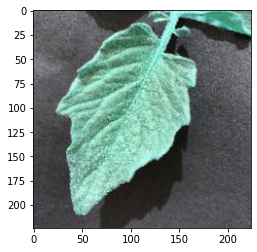

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

orig_img = np.array(load_img('/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1884.jpeg'),dtype=np.uint8)
plt.imshow(orig_img)
plt.show()

In [ ]:
/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1339.jpeg

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/scorecamutil.py' .

In [ ]:
tf.keras.models.save_model(
    model,
    './trained_model_vgg_scorecam.h5',
    overwrite=True,
    include_optimizer=True
)

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

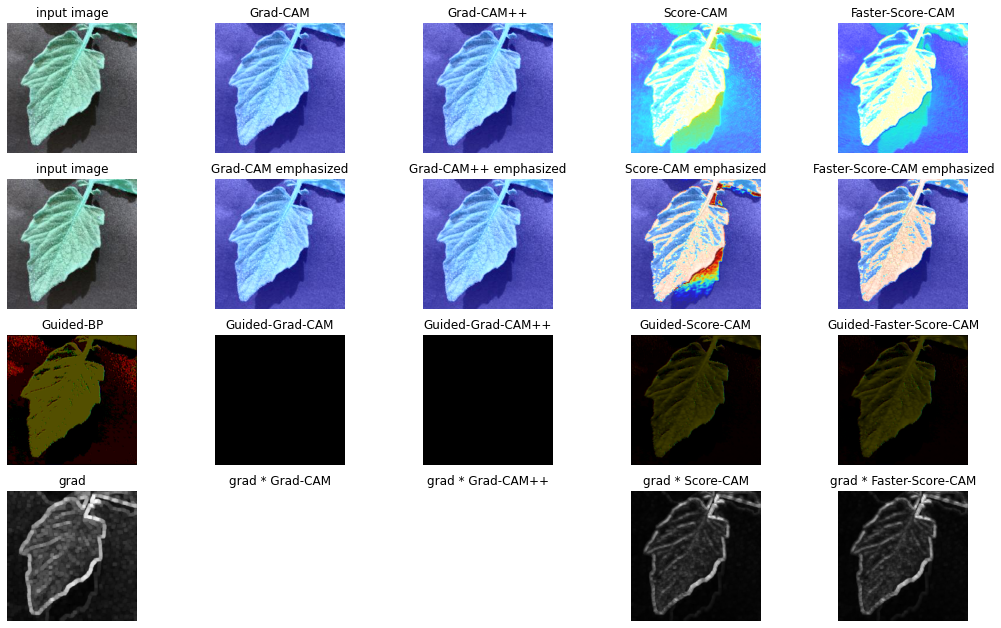

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scorecamutil import GradCam, GradCamPlusPlus, ScoreCam, build_guided_model, GuidedBackPropagation, superimpose, read_and_preprocess_img

def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1884.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block1_conv1'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

In [ ]:
print("Grad-CAM")
%timeit grad_cam = GradCam(model, img_array, layer_name)
print("Grad-CAM++")
%timeit grad_cam_plus_plus = GradCamPlusPlus(model, img_array, layer_name)
print("Score-Cam")
%timeit score_cam = ScoreCam(model, img_array, layer_name)
print("Faster-Score-Cam N=10")
%timeit faster_score_cam = ScoreCam(model, img_array, layer_name, max_N=10)
print("Faster-Score-Cam N=3")
%timeit faster_score_cam = ScoreCam(model, img_array, layer_name, max_N=3)
print("Guided-BP")
%timeit saliency = GuidedBackPropagation(guided_model, img_array, layer_name)

Grad-CAM


/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0


1 loop, best of 5: 352 ms per loop
Grad-CAM++


/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))


1 loop, best of 5: 463 ms per loop
Score-Cam


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1 loop, best of 5: 521 ms per loop
Faster-Score-Cam N=10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1 loop, best of 5: 260 ms per loop
Faster-Score-Cam N=3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


The slowest run took 7.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 225 ms per loop
Guided-BP
10 loops, best of 5: 178 ms per loop


In [ ]:
/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1884.jpeg

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

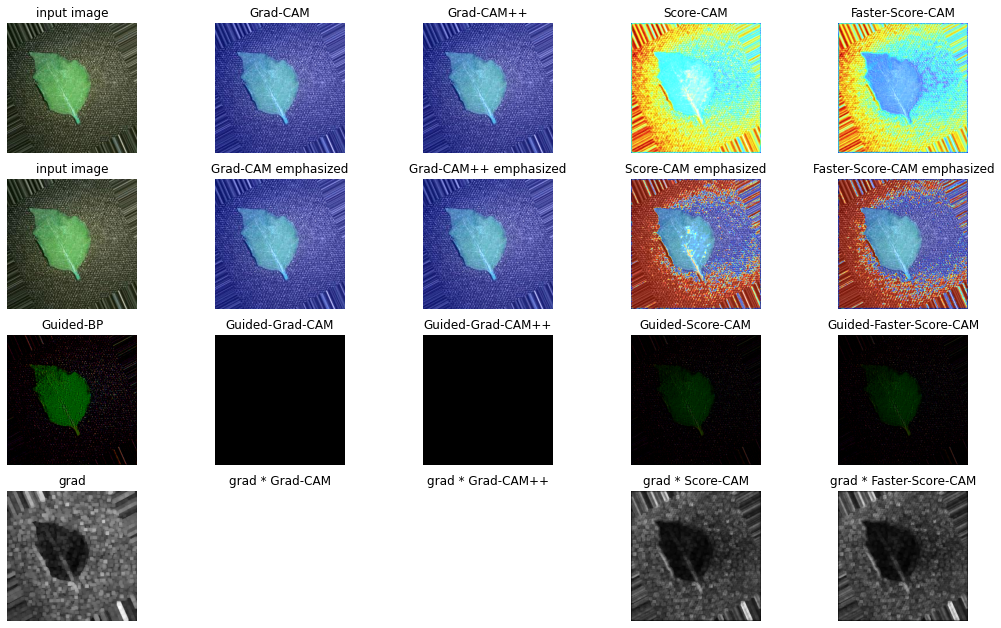

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1339.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block1_conv2'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

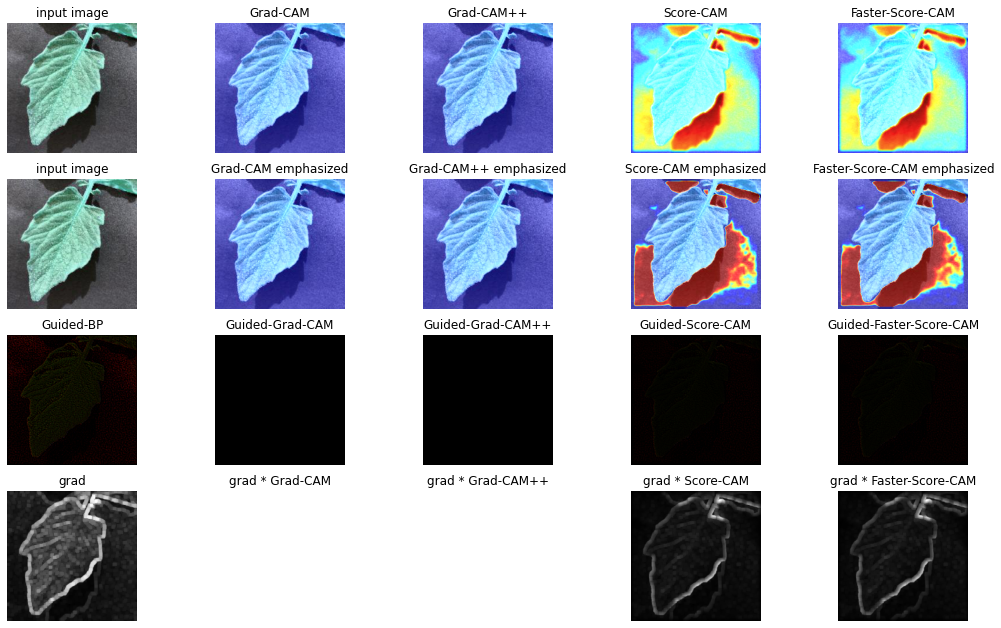

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1884.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block2_conv2'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

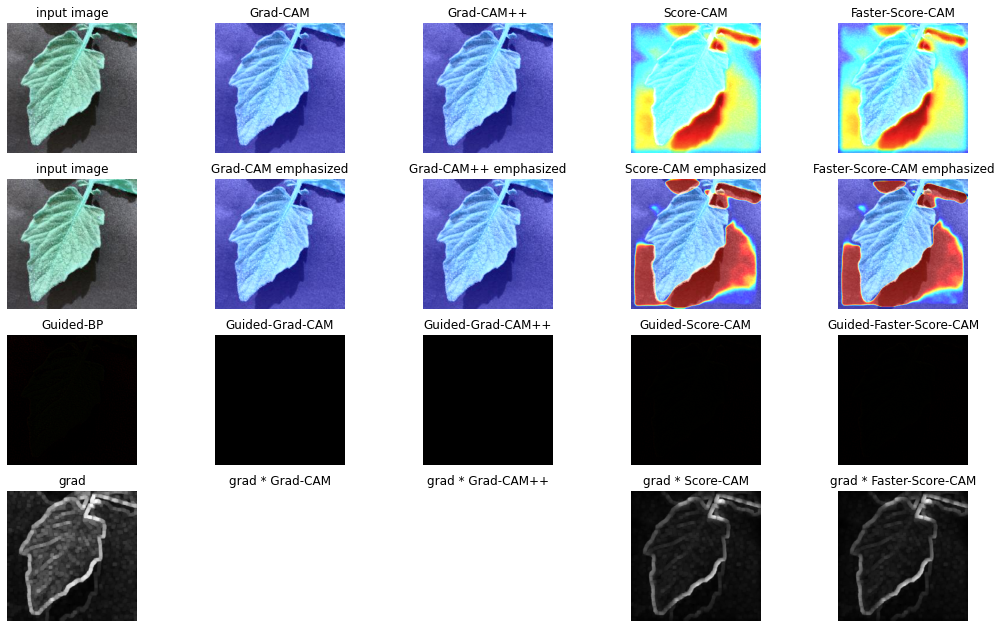

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1884.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block3_conv1'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

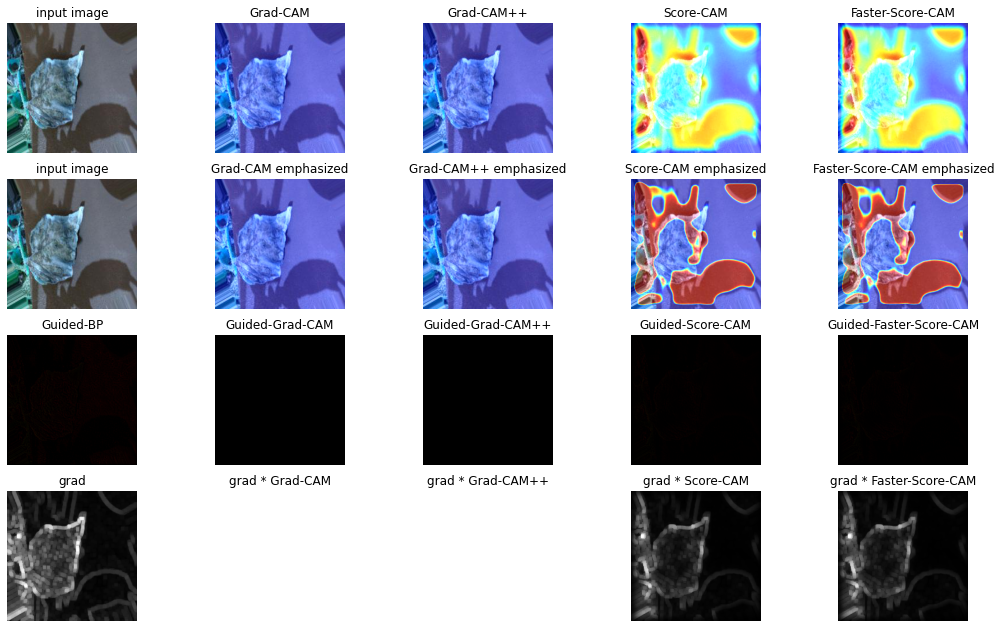

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/L blight/sls_0_1005.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block3_conv2'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

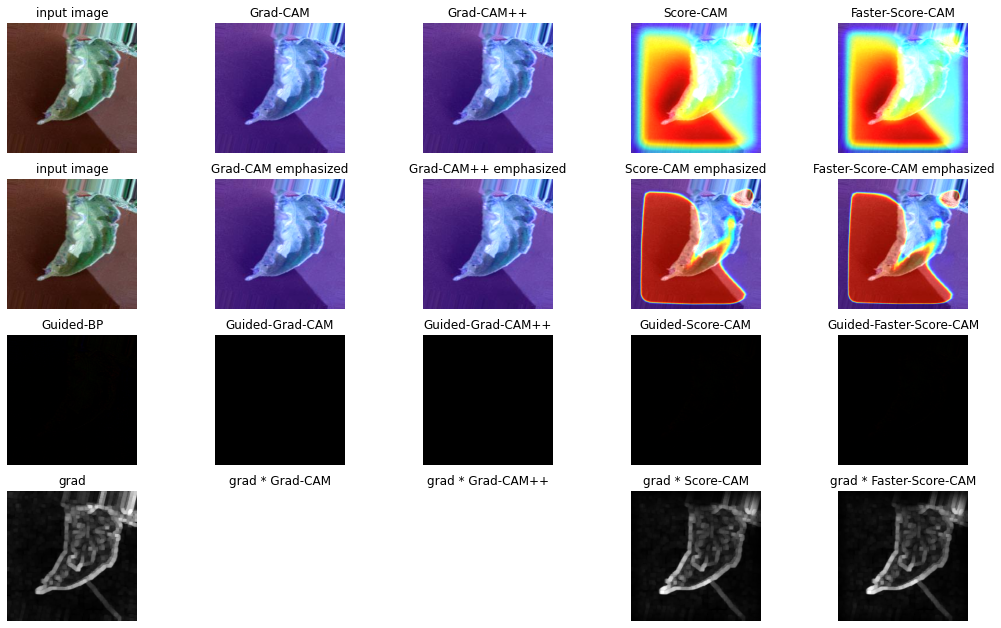

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/E-blight/sls_0_1023.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block4_conv2'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

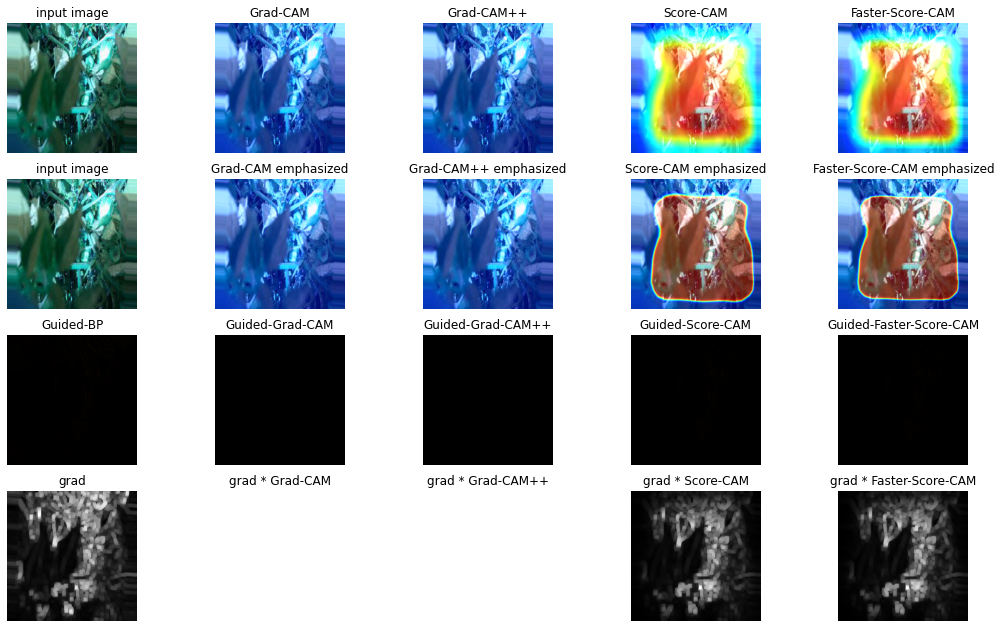

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/BLF/sls_0_1147.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block5_conv2'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

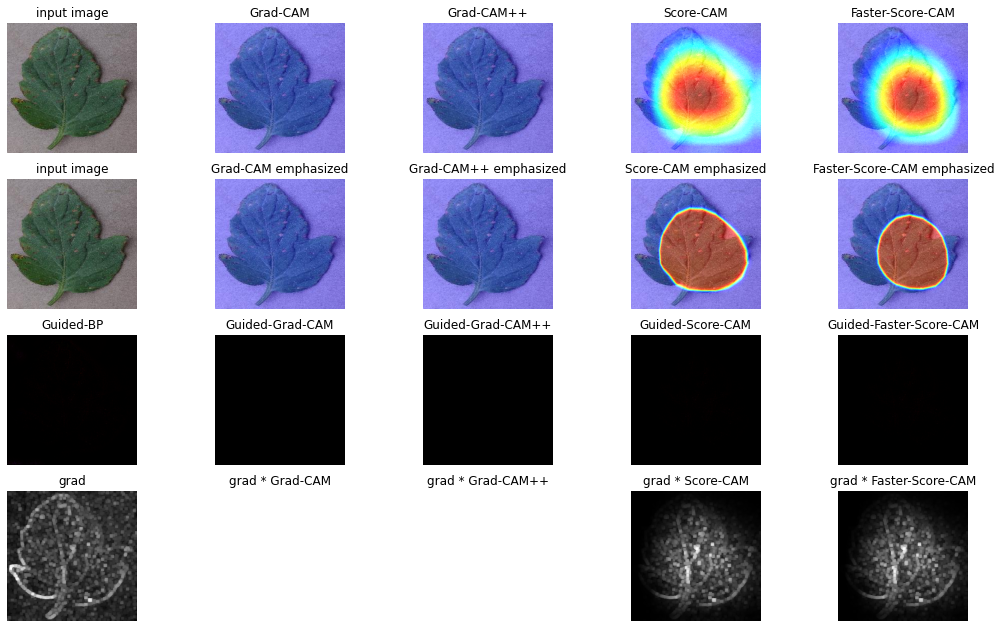

In [ ]:
# def build_Sequential_and_load():
#     model = build_Sequential()
#     model.load_weights('/content/trained_model_vgg_scorecam.h5')
#     return model

# img_path = '/content/drive/MyDrive/Dataset/PlantVillageDataset/PlantVillage/Test/Tomato___Bacterial_spot/dbda016b-fd39-451d-82e5-08e42ea6bcda___GCREC_Bact.Sp 3285.JPG'

# orig_img = np.array(load_img(img_path),dtype=np.uint8)
# img_array = read_and_preprocess_img(img_path, size=(224,224))

# layer_name = 'block6_conv2'

# # predictions = model.predict(img_array)
# # top = decode_predictions(predictions, top=5)[0]
# # print(img_path)
# # print("class activation map for:",top[0])

# grad_cam=GradCam(model,img_array,layer_name)
# grad_cam_superimposed = superimpose(img_path, grad_cam)
# grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

# grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
# grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
# grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

# score_cam=ScoreCam(model,img_array,layer_name)
# score_cam_superimposed = superimpose(img_path, score_cam)
# score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

# faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
# faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
# faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

# guided_model = build_guided_model(build_Sequential_and_load)
# saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
# saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

# grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
# guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

# grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
# guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

# score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
# guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

# faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
# guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

# img_gray = cv2.imread(img_path, 0)
# dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
# dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
# grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
# grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
# grad -= np.min(grad)
# grad /= np.max(grad)  # scale 0. to 1.

# grad_times_grad_cam = grad * grad_cam_resized
# grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
# grad_times_score_cam = grad * score_cam_resized
# grad_times_faster_score_cam = grad * faster_score_cam_resized

# fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
# ax[0,0].imshow(orig_img)
# ax[0,0].set_title("input image")
# ax[0,1].imshow(grad_cam_superimposed)
# ax[0,1].set_title("Grad-CAM")
# ax[0,2].imshow(grad_cam_plus_plus_superimposed)
# ax[0,2].set_title("Grad-CAM++")
# ax[0,3].imshow(score_cam_superimposed)
# ax[0,3].set_title("Score-CAM")
# ax[0,4].imshow(faster_score_cam_superimposed)
# ax[0,4].set_title("Faster-Score-CAM")
# ax[1,0].imshow(orig_img)
# ax[1,0].set_title("input image")
# ax[1,1].imshow(grad_cam_emphasized)
# ax[1,1].set_title("Grad-CAM emphasized")
# ax[1,2].imshow(grad_cam_plus_plus_emphasized)
# ax[1,2].set_title("Grad-CAM++ emphasized")
# ax[1,3].imshow(score_cam_emphasized)
# ax[1,3].set_title("Score-CAM emphasized")
# ax[1,4].imshow(faster_score_cam_emphasized)
# ax[1,4].set_title("Faster-Score-CAM emphasized")
# ax[2,0].imshow(saliency_resized)
# ax[2,0].set_title("Guided-BP")
# ax[2,1].imshow(guided_grad_cam)
# ax[2,1].set_title("Guided-Grad-CAM")
# ax[2,2].imshow(guided_grad_cam_plus_plus)
# ax[2,2].set_title("Guided-Grad-CAM++")
# ax[2,3].imshow(guided_score_cam)
# ax[2,3].set_title("Guided-Score-CAM")
# ax[2,4].imshow(guided_faster_score_cam)
# ax[2,4].set_title("Guided-Faster-Score-CAM")
# ax[3,0].imshow(grad, 'gray')
# ax[3,0].set_title("grad")
# ax[3,1].imshow(grad_times_grad_cam, 'gray')
# ax[3,1].set_title("grad * Grad-CAM")
# ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
# ax[3,2].set_title("grad * Grad-CAM++")
# ax[3,3].imshow(grad_times_score_cam, 'gray')
# ax[3,3].set_title("grad * Score-CAM")
# ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
# ax[3,4].set_title("grad * Faster-Score-CAM")
# for i in range(4):
#     for j in range(5):
#         ax[i,j].axis('off')
# plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

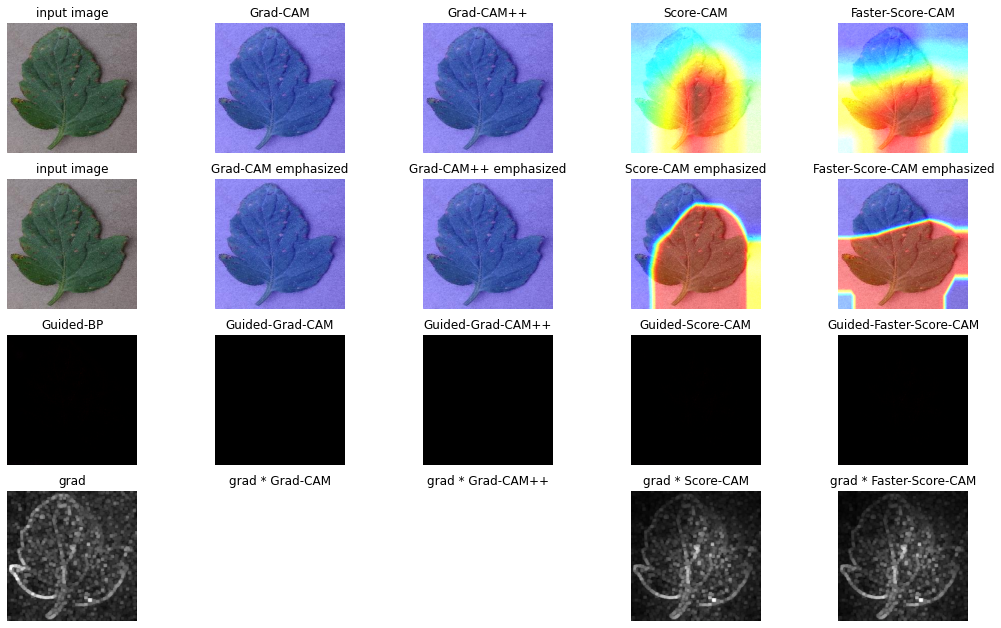

In [ ]:
# def build_Sequential_and_load():
#     model = build_Sequential()
#     model.load_weights('/content/trained_model_vgg_scorecam.h5')
#     return model

# img_path = '/content/drive/MyDrive/Dataset/PlantVillageDataset/PlantVillage/Test/Tomato___Bacterial_spot/dbda016b-fd39-451d-82e5-08e42ea6bcda___GCREC_Bact.Sp 3285.JPG'
# orig_img = np.array(load_img(img_path),dtype=np.uint8)
# img_array = read_and_preprocess_img(img_path, size=(224,224))

# layer_name = 'block7_conv1'

# # predictions = model.predict(img_array)
# # top = decode_predictions(predictions, top=5)[0]
# # print(img_path)
# # print("class activation map for:",top[0])

# grad_cam=GradCam(model,img_array,layer_name)
# grad_cam_superimposed = superimpose(img_path, grad_cam)
# grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

# grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
# grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
# grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

# score_cam=ScoreCam(model,img_array,layer_name)
# score_cam_superimposed = superimpose(img_path, score_cam)
# score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

# faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
# faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
# faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

# guided_model = build_guided_model(build_Sequential_and_load)
# saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
# saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

# grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
# guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

# grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
# guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

# score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
# guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

# faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
# guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

# img_gray = cv2.imread(img_path, 0)
# dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
# dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
# grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
# grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
# grad -= np.min(grad)
# grad /= np.max(grad)  # scale 0. to 1.

# grad_times_grad_cam = grad * grad_cam_resized
# grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
# grad_times_score_cam = grad * score_cam_resized
# grad_times_faster_score_cam = grad * faster_score_cam_resized

# fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
# ax[0,0].imshow(orig_img)
# ax[0,0].set_title("input image")
# ax[0,1].imshow(grad_cam_superimposed)
# ax[0,1].set_title("Grad-CAM")
# ax[0,2].imshow(grad_cam_plus_plus_superimposed)
# ax[0,2].set_title("Grad-CAM++")
# ax[0,3].imshow(score_cam_superimposed)
# ax[0,3].set_title("Score-CAM")
# ax[0,4].imshow(faster_score_cam_superimposed)
# ax[0,4].set_title("Faster-Score-CAM")
# ax[1,0].imshow(orig_img)
# ax[1,0].set_title("input image")
# ax[1,1].imshow(grad_cam_emphasized)
# ax[1,1].set_title("Grad-CAM emphasized")
# ax[1,2].imshow(grad_cam_plus_plus_emphasized)
# ax[1,2].set_title("Grad-CAM++ emphasized")
# ax[1,3].imshow(score_cam_emphasized)
# ax[1,3].set_title("Score-CAM emphasized")
# ax[1,4].imshow(faster_score_cam_emphasized)
# ax[1,4].set_title("Faster-Score-CAM emphasized")
# ax[2,0].imshow(saliency_resized)
# ax[2,0].set_title("Guided-BP")
# ax[2,1].imshow(guided_grad_cam)
# ax[2,1].set_title("Guided-Grad-CAM")
# ax[2,2].imshow(guided_grad_cam_plus_plus)
# ax[2,2].set_title("Guided-Grad-CAM++")
# ax[2,3].imshow(guided_score_cam)
# ax[2,3].set_title("Guided-Score-CAM")
# ax[2,4].imshow(guided_faster_score_cam)
# ax[2,4].set_title("Guided-Faster-Score-CAM")
# ax[3,0].imshow(grad, 'gray')
# ax[3,0].set_title("grad")
# ax[3,1].imshow(grad_times_grad_cam, 'gray')
# ax[3,1].set_title("grad * Grad-CAM")
# ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
# ax[3,2].set_title("grad * Grad-CAM++")
# ax[3,3].imshow(grad_times_score_cam, 'gray')
# ax[3,3].set_title("grad * Score-CAM")
# ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
# ax[3,4].set_title("grad * Faster-Score-CAM")
# for i in range(4):
#     for j in range(5):
#         ax[i,j].axis('off')
# plt.show()

/content/scorecamutil.py:41: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)  # scale 0 to 1.0
/content/scorecamutil.py:67: RuntimeWarning: invalid value encountered in true_divide
  alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/

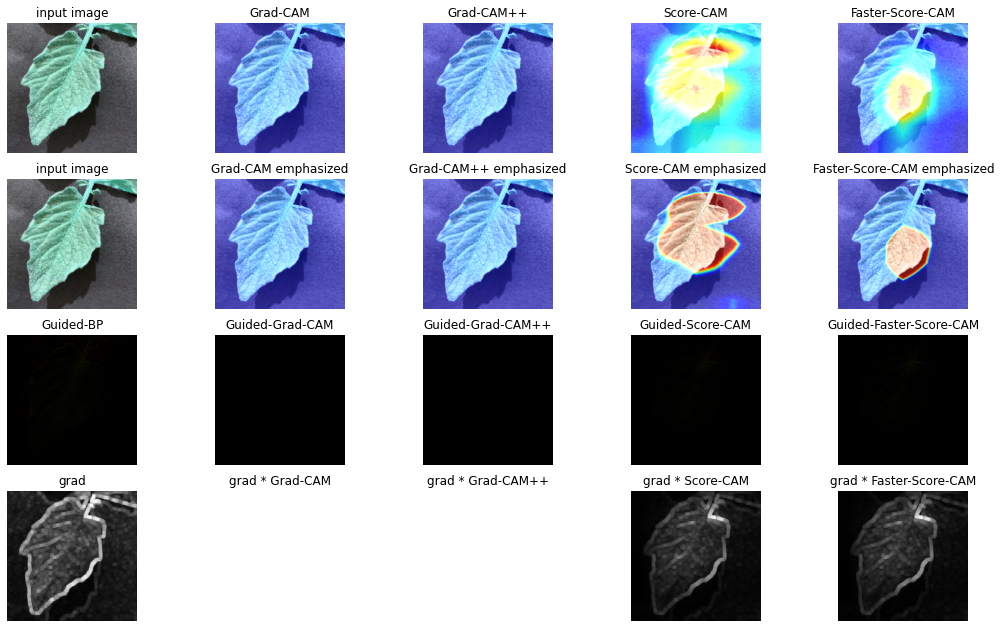

In [ ]:
def build_Sequential_and_load():
    model = build_Sequential()
    model.load_weights('/content/trained_model_vgg_scorecam.h5')
    return model

img_path = '/content/drive/MyDrive/Dataset/AugmentRealWorld/Train/healthy/sls_0_1884.jpeg'
orig_img = np.array(load_img(img_path),dtype=np.uint8)
img_array = read_and_preprocess_img(img_path, size=(224,224))

layer_name = 'block7_conv2'

# predictions = model.predict(img_array)
# top = decode_predictions(predictions, top=5)[0]
# print(img_path)
# print("class activation map for:",top[0])

grad_cam=GradCam(model,img_array,layer_name)
grad_cam_superimposed = superimpose(img_path, grad_cam)
grad_cam_emphasized = superimpose(img_path, grad_cam, emphasize=True)

grad_cam_plus_plus=GradCamPlusPlus(model,img_array,layer_name)
grad_cam_plus_plus_superimposed = superimpose(img_path, grad_cam_plus_plus)
grad_cam_plus_plus_emphasized = superimpose(img_path, grad_cam_plus_plus, emphasize=True)

score_cam=ScoreCam(model,img_array,layer_name)
score_cam_superimposed = superimpose(img_path, score_cam)
score_cam_emphasized = superimpose(img_path, score_cam, emphasize=True)

faster_score_cam=ScoreCam(model,img_array,layer_name, max_N=10)
faster_score_cam_superimposed = superimpose(img_path, faster_score_cam)
faster_score_cam_emphasized = superimpose(img_path, faster_score_cam, emphasize=True)

guided_model = build_guided_model(build_Sequential_and_load)
saliency = GuidedBackPropagation(guided_model, img_array, layer_name)
saliency_resized = cv2.resize(saliency, (orig_img.shape[1], orig_img.shape[0]))

grad_cam_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam = saliency_resized * grad_cam_resized[..., np.newaxis]

grad_cam_plus_plus_resized = cv2.resize(grad_cam_plus_plus, (orig_img.shape[1], orig_img.shape[0]))
guided_grad_cam_plus_plus = saliency_resized * grad_cam_plus_plus_resized[..., np.newaxis]

score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_score_cam = saliency_resized * score_cam_resized[..., np.newaxis]

faster_score_cam_resized = cv2.resize(score_cam, (orig_img.shape[1], orig_img.shape[0]))
guided_faster_score_cam = saliency_resized * faster_score_cam_resized[..., np.newaxis]

img_gray = cv2.imread(img_path, 0)
dx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
grad = np.sqrt(dx ** 2 + dy ** 2)  # 画像の勾配を取得
grad = cv2.dilate(grad,kernel=np.ones((5,5)), iterations=1)  # 太らせる処理
grad -= np.min(grad)
grad /= np.max(grad)  # scale 0. to 1.

grad_times_grad_cam = grad * grad_cam_resized
grad_times_grad_cam_plus_plus = grad * grad_cam_plus_plus_resized
grad_times_score_cam = grad * score_cam_resized
grad_times_faster_score_cam = grad * faster_score_cam_resized

fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(18, 11))
ax[0,0].imshow(orig_img)
ax[0,0].set_title("input image")
ax[0,1].imshow(grad_cam_superimposed)
ax[0,1].set_title("Grad-CAM")
ax[0,2].imshow(grad_cam_plus_plus_superimposed)
ax[0,2].set_title("Grad-CAM++")
ax[0,3].imshow(score_cam_superimposed)
ax[0,3].set_title("Score-CAM")
ax[0,4].imshow(faster_score_cam_superimposed)
ax[0,4].set_title("Faster-Score-CAM")
ax[1,0].imshow(orig_img)
ax[1,0].set_title("input image")
ax[1,1].imshow(grad_cam_emphasized)
ax[1,1].set_title("Grad-CAM emphasized")
ax[1,2].imshow(grad_cam_plus_plus_emphasized)
ax[1,2].set_title("Grad-CAM++ emphasized")
ax[1,3].imshow(score_cam_emphasized)
ax[1,3].set_title("Score-CAM emphasized")
ax[1,4].imshow(faster_score_cam_emphasized)
ax[1,4].set_title("Faster-Score-CAM emphasized")
ax[2,0].imshow(saliency_resized)
ax[2,0].set_title("Guided-BP")
ax[2,1].imshow(guided_grad_cam)
ax[2,1].set_title("Guided-Grad-CAM")
ax[2,2].imshow(guided_grad_cam_plus_plus)
ax[2,2].set_title("Guided-Grad-CAM++")
ax[2,3].imshow(guided_score_cam)
ax[2,3].set_title("Guided-Score-CAM")
ax[2,4].imshow(guided_faster_score_cam)
ax[2,4].set_title("Guided-Faster-Score-CAM")
ax[3,0].imshow(grad, 'gray')
ax[3,0].set_title("grad")
ax[3,1].imshow(grad_times_grad_cam, 'gray')
ax[3,1].set_title("grad * Grad-CAM")
ax[3,2].imshow(grad_times_grad_cam_plus_plus, 'gray')
ax[3,2].set_title("grad * Grad-CAM++")
ax[3,3].imshow(grad_times_score_cam, 'gray')
ax[3,3].set_title("grad * Score-CAM")
ax[3,4].imshow(grad_times_faster_score_cam, 'gray')
ax[3,4].set_title("grad * Faster-Score-CAM")
for i in range(4):
    for j in range(5):
        ax[i,j].axis('off')
plt.show()